In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "housing-dataset-of-5000-people-staying-in-usa"

**About Dataset**


A dataset in CSV format that describes the rows where 5000 entries of each particular house in USA .
The dataset has columns as such as :

* Avg. Area Income : Average income of people residing in a particular area.
* Avg. Area House Age : Average age of houses in the particular area.
* Avg. Area Number of Rooms : Average number of rooms in each house .
* Avg. Area Number of Bedrooms : Average number of bedrooms in a particular house.
* Area Population : Population or the people residing in that area.
* Price : Price of house
* Address : A unique column that has a unique value for each entry of data in the whole dataset (count = 5000).

Do upvote the dataset so it can reach further kagglers

In [2]:
#load the packages
library(tidyverse)
library(dplyr)
library(readr)
library(ggplot2)
library(plotly)
library(janitor)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout


The following object is masked from ‘package:httr’:

    config



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




**Load the csv file**

In [3]:
library(corrplot)


corrplot 0.92 loaded



**Function to plot width and height of plot**

In [4]:
# Function to plot width and height of plot
fig<-function(x,y){
    options(repr.plot.width = x, repr.plot.height = y)
    }

In [5]:
house = read.csv("/kaggle/input/housing-dataset-of-5000-people-staying-in-usa/USA_Housing.csv")

In [6]:
head(house)

,Avg..Area.Income,Avg..Area.House.Age,Avg..Area.Number.of.Rooms,Avg..Area.Number.of.Bedrooms,Area.Population,Price,Address
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,79545.46,5.682861,7.009188,4.09,23086.80,1059033.6,"208 Michael Ferry Apt. 674 Laurabury, NE 37010-5101"
2,79248.64,6.002900,6.730821,3.09,40173.07,1505890.9,"188 Johnson Views Suite 079 Lake Kathleen, CA 48958"
3,61287.07,5.865890,8.512727,5.13,36882.16,1058988.0,"9127 Elizabeth Stravenue Danieltown, WI 06482-3489"
4,63345.24,7.188236,5.586729,3.26,34310.24,1260616.8,USS Barnett FPO AP 44820
5,59982.20,5.040555,7.839388,4.23,26354.11,630943.5,USNS Raymond FPO AE 09386
6,80175.75,4.988408,6.104512,4.04,26748.43,1068138.1,"06039 Jennifer Islands Apt. 443 Tracyport, KS 16077"


**Data Wrangling And cleaning**

In [7]:
summary(house)

 Avg..Area.Income Avg..Area.House.Age Avg..Area.Number.of.Rooms
 Min.   : 17797   Min.   :2.644       Min.   : 3.236           
 1st Qu.: 61481   1st Qu.:5.322       1st Qu.: 6.299           
 Median : 68804   Median :5.970       Median : 7.003           
 Mean   : 68583   Mean   :5.977       Mean   : 6.988           
 3rd Qu.: 75783   3rd Qu.:6.651       3rd Qu.: 7.666           
 Max.   :107702   Max.   :9.519       Max.   :10.760           
 Avg..Area.Number.of.Bedrooms Area.Population       Price        
 Min.   :2.000                Min.   :  172.6   Min.   :  15939  
 1st Qu.:3.140                1st Qu.:29403.9   1st Qu.: 997577  
 Median :4.050                Median :36199.4   Median :1232669  
 Mean   :3.981                Mean   :36163.5   Mean   :1232073  
 3rd Qu.:4.490                3rd Qu.:42861.3   3rd Qu.:1471210  
 Max.   :6.500                Max.   :69621.7   Max.   :2469066  
   Address         
 Length:5000       
 Class :character  
 Mode  :character  
          

In [8]:
str(house)

'data.frame':	5000 obs. of  7 variables:
 $ Avg..Area.Income            : num  79545 79249 61287 63345 59982 ...
 $ Avg..Area.House.Age         : num  5.68 6 5.87 7.19 5.04 ...
 $ Avg..Area.Number.of.Rooms   : num  7.01 6.73 8.51 5.59 7.84 ...
 $ Avg..Area.Number.of.Bedrooms: num  4.09 3.09 5.13 3.26 4.23 4.04 3.41 2.42 2.3 6.1 ...
 $ Area.Population             : num  23087 40173 36882 34310 26354 ...
 $ Price                       : num  1059034 1505891 1058988 1260617 630943 ...
 $ Address                     : chr  "208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101" "188 Johnson Views Suite 079\nLake Kathleen, CA 48958" "9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489" "USS Barnett\nFPO AP 44820" ...


In [9]:
#count the  null value
sum(is.na(house))
unique(count(house))

[1] 0

,n
,<int>
1,5000


In [10]:
sum(duplicated(house))

[1] 0

In [11]:

df <- house %>%  clean_names()

In [12]:
glimpse(df)

Rows: 5,000
Columns: 7
$ avg_area_income             <dbl> 79545.46, 79248.64, 61287.07, 63345.24, 59…
$ avg_area_house_age          <dbl> 5.682861, 6.002900, 5.865890, 7.188236, 5.…
$ avg_area_number_of_rooms    <dbl> 7.009188, 6.730821, 8.512727, 5.586729, 7.…
$ avg_area_number_of_bedrooms <dbl> 4.09, 3.09, 5.13, 3.26, 4.23, 4.04, 3.41, …
$ area_population             <dbl> 23086.80, 40173.07, 36882.16, 34310.24, 26…
$ price                       <dbl> 1059033.6, 1505890.9, 1058988.0, 1260616.8…
$ address                     <chr> "208 Michael Ferry Apt. 674\nLaurabury, NE…


In [13]:
sapply(df, class)

avg_area_income          avg_area_house_age 
                  "numeric"                   "numeric" 
   avg_area_number_of_rooms avg_area_number_of_bedrooms 
                  "numeric"                   "numeric" 
            area_population                       price 
                  "numeric"                   "numeric" 
                    address 
                "character"

In [14]:
#remove the adress column
df_1 <- subset(df, select = -c(address))

**let's check the corre**

In [15]:
sapply(df_1, class)
summary(df_1$avg_area_income )

avg_area_income          avg_area_house_age 
                  "numeric"                   "numeric" 
   avg_area_number_of_rooms avg_area_number_of_bedrooms 
                  "numeric"                   "numeric" 
            area_population                       price 
                  "numeric"                   "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17797   61481   68804   68583   75783  107702 

In [16]:
#correlation for all the numeric values

round(cor(df_1),
  digits = 2 # rounded to 2 decimals
)

,avg_area_income,avg_area_house_age,avg_area_number_of_rooms,avg_area_number_of_bedrooms,area_population,price
avg_area_income,1.00,0.00,-0.01,0.02,-0.02,0.64
avg_area_house_age,0.00,1.00,-0.01,0.01,-0.02,0.45
avg_area_number_of_rooms,-0.01,-0.01,1.00,0.46,0.00,0.34
avg_area_number_of_bedrooms,0.02,0.01,0.46,1.00,-0.02,0.17
area_population,-0.02,-0.02,0.00,-0.02,1.00,0.41
price,0.64,0.45,0.34,0.17,0.41,1.00


Explore correlation

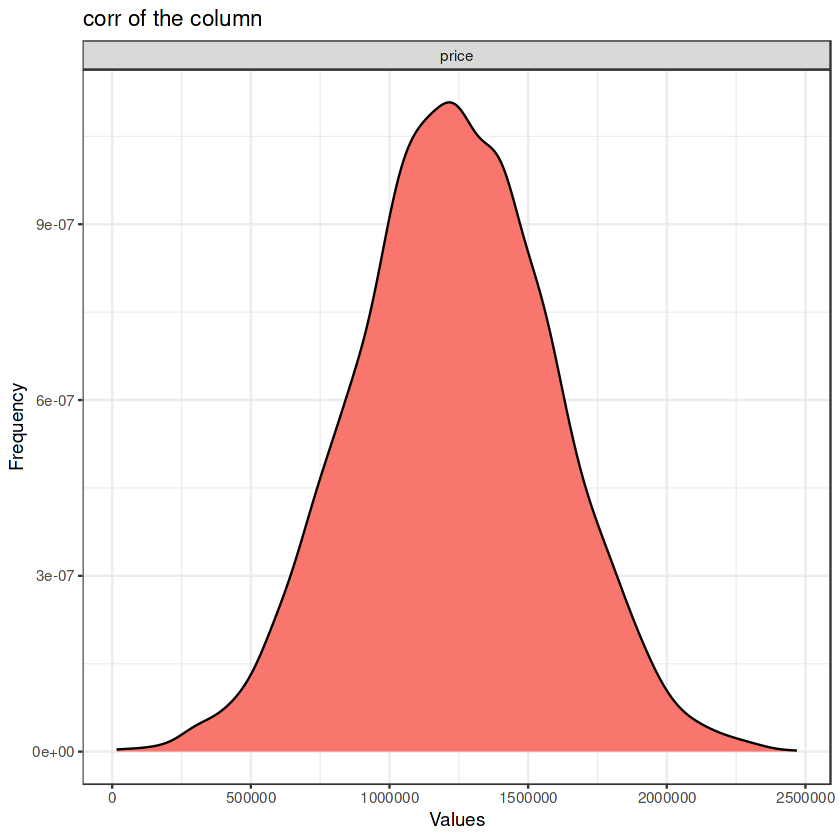

In [23]:
#The histogram for the response variable SalePrice shows that it is skewed. Taking the log of the variable normalizes it.

# Histogram for each Attribute
df_1 %>%
  gather(Attributes, value, 6) %>%
  ggplot(aes(x=value, fill=Attributes)) +
  geom_density(colour="black", show.legend=FALSE) +
  facet_wrap(~Attributes, scales="free_x") +
  labs(x="Values", y="Frequency",
       title="corr of the column") +
  theme_bw()





In [18]:
## correlation between price and area_population column

cor(df_1$price, df_1$area_population)

[1] 0.4085559

In [19]:
 ## correlation between price and area_income column
cor(df_1$price, df_1$avg_area_income)

[1] 0.6397338

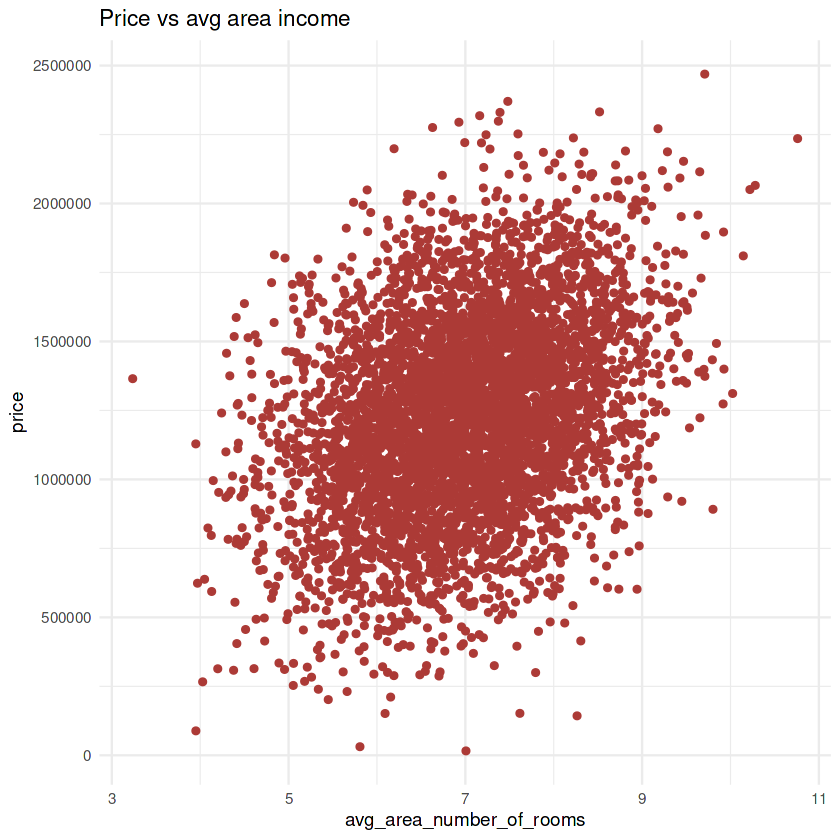

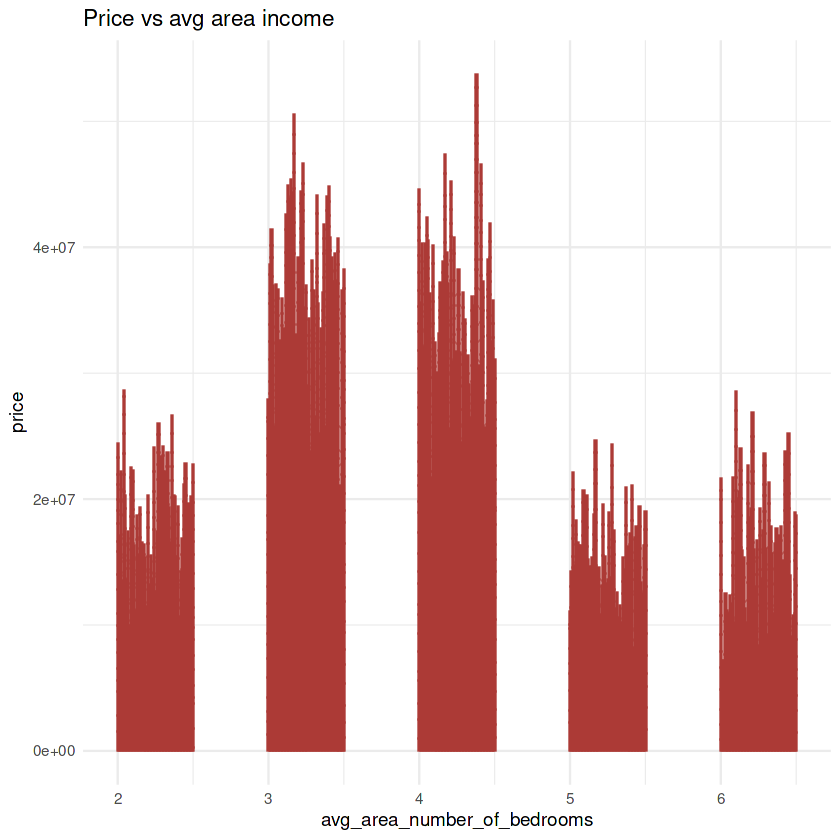

In [20]:
# scatterplot

ggplot(df_1) +
  aes(x = avg_area_number_of_rooms, y = price) +
  geom_jitter(colour = "#AC3A36") +
  theme_minimal()+labs(title="Price vs avg area income")


ggplot(df_1) +
  aes(x = avg_area_number_of_bedrooms, y = price) +
  geom_col(colour = "#AC3A36") +
  theme_minimal()+labs(title="Price vs avg area income")



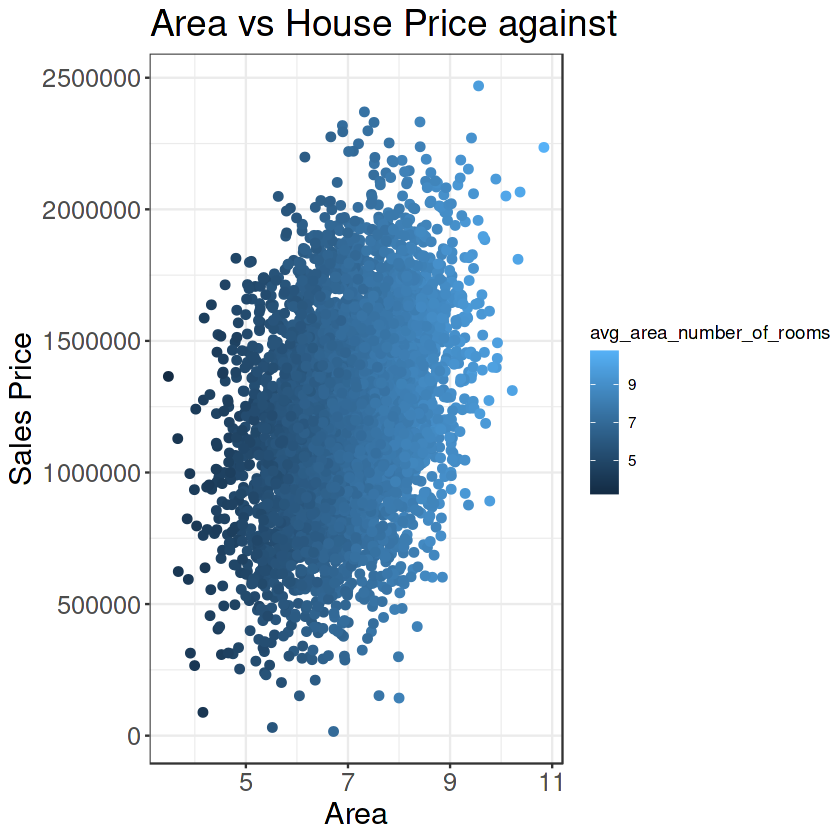

In [21]:
ggplot(df_1, aes(x=avg_area_number_of_rooms, y=price,color=avg_area_number_of_rooms)) +
  geom_jitter(width = .3, size=2)+  # Adjusting size and width of points
    labs(x="Area",
         y="Sales Price", 
       title="Area vs House Price against")+ 
theme_bw()+
theme(plot.title = element_text(size=22),axis.text.x= element_text(size=15),
                            axis.text.y= element_text(size=15), axis.title=element_text(size=18))

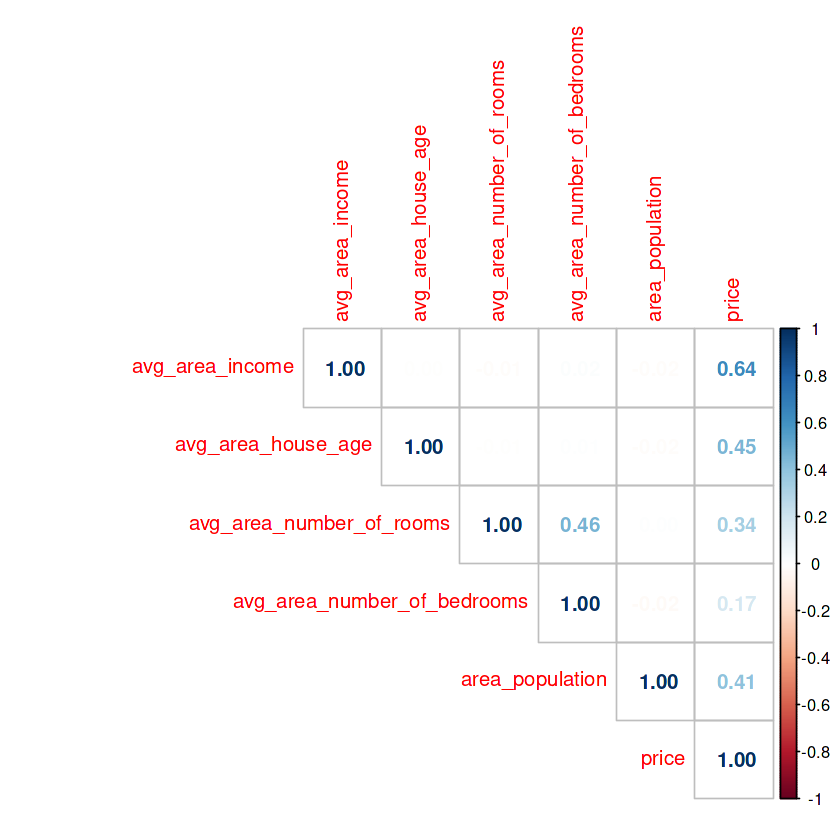

In [22]:
library(corrplot)

corrplot(cor(df_1),
  method = "number",
  type = "upper" # show only upper side
)

Noticeable variable pairs which are highly correlated:

1. Avg area income vs price 67%
2. Avg area number of rooms vs avg area number of bedroom 46%
3. avg area house age vs price 45%
4. Area population vs price 41%
5. Avg area number of rooms vs price 34%

**key insight**

The 4 bedroom are the most expensive on the list, the other factors that influance the price is the age of the house and the population of the area 